In [1]:
import hydrofunctions as hf
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
hf.draw_map()

In [3]:
#farthest upstream is GWYNNS FALLS NEAR DELIGHT, MD, dv01589197
#middle of stream is GWYNNS FALLS AT VILLA NOVA, MD, dv01589300
#farthest downstream is GWYNNS FALLS AT WASHINGTON BLVD AT BALTIMORE, MD, dv01589352
# request data for our two sites for a three-year period.
streamid = ['01589197', '01589300','01589352']
sites = hf.NWIS(streamid, start_date='2001-01-01', end_date='2003-12-31')
sites.get_data()
#validate that the data was imported
sites.ok

True

In [4]:
#create a dataframe of the sites
Q = sites.df()
#show the first few rows of the data
Q.head()

,USGS:01589197:00060:00003,USGS:01589197:00060:00003_qualifiers,USGS:01589300:00060:00003,USGS:01589300:00060:00003_qualifiers,USGS:01589352:00060:00003,USGS:01589352:00060:00003_qualifiers
2001-01-01,1.8,A e,18.0,A,29.0,A
2001-01-02,1.8,A e,17.0,A,28.0,A e
2001-01-03,1.8,A e,16.0,A e,27.0,A
2001-01-04,1.8,A e,17.0,A e,31.0,A
2001-01-05,1.8,A e,16.0,A e,31.0,A


In [5]:
#drop the qualifier columns from the dataframe
Q = Q.drop(['USGS:01589197:00060:00003_qualifiers','USGS:01589300:00060:00003_qualifiers', "USGS:01589352:00060:00003_qualifiers"], axis=1)
#rename the columns
Q.columns=['Upper', 'Middle', 'Lower']
#verify that the columns were dropped and renamed by showing the first few rows
Q.head()

,Upper,Middle,Lower
2001-01-01,1.8,18.0,29.0
2001-01-02,1.8,17.0,28.0
2001-01-03,1.8,16.0,27.0
2001-01-04,1.8,17.0,31.0
2001-01-05,1.8,16.0,31.0


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x175c169ce48>)

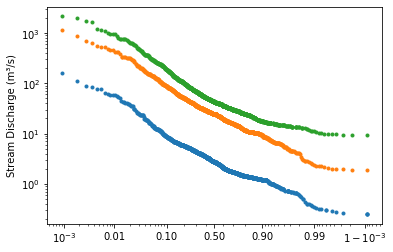

In [6]:
#create a flow duration for each of the streams
hf.flow_duration(Q)

In [7]:
#if you want to create a legend and/or x-label, you can edit the code from hydrofunctions. 
#Pull it up by typing hf.flowduration??? then copy and paste into the next cell
hf.flow_duration??

In [8]:
#alter the source code to create an x-axis, title, and legend
def flow_duration_labeled(Qdf, xscale='logit', yscale='log', ylabel='Stream Discharge (m³/s)', symbol='.'):
    """Creates a flow duration chart from a dataframe of discharges.

    Args:
        Qdf (dataframe): a dataframe of discharge values.
            * Values should be arranged in columns
            * No sorting necessary
            * Rows do not need an index
            * If more than one column, each column will be added as a\
                separate color to the chart.
            * Only include columns with discharge values; no metadata

        xscale ('logit' | 'linear'): Type of x scale for plotting probabilities
            default is 'logit', so that each standard deviation is nearly the
            same distance on the x scale. 'linear' is the other option.

        yscale ('log' | 'linear'): The type of y scale for plotting discharge.
            Default is 'log'.

        ylabel (str, default: 'Stream Discharge (m³/s)'): The label for the Y axis.

        xlabel (not implemented)

        symbol (str, '.' | ','): formatting symbol for points.
            * point: '.' (default)
            * pixel point: ','
            * circle: 'o'
            * triangle up: '^'

            See https://matplotlib.org/api/markers_api.html for full list of
            point formatters.

    Returns:
        fig (matplotlib.figure.Figure):
            a matplotlib figure. This will plot immediately in a Jupyter
            notebook if the command '%matplotlib inline' was previously issued.
            The figure may also be altered after it is returned.

        ax (matplotlib.axes.Axes):
            a matplotlib chart. This may be altered after it is returned.

    """
    rank = Qdf.rank(ascending=False, pct=True)
    x = rank
    y = Qdf
#add xlabel
    xlabel="Probability"
    fig, ax = plt.subplots(1, 1)
    ax.plot(x, y, symbol)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
#add legend    
    ax.legend(Q.columns, loc='upper right')
#add title    
    ax.title.set_text("Gwynn's Falls Flow Duration")
    # A pyplot bug causes a valueError value if the xlabel is set.
    #ax.set_xlabel('Probability of Exceedence')
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x175c3657848>)

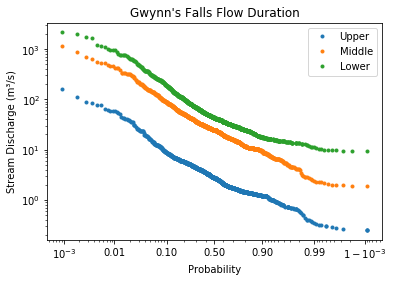

In [9]:
flow_duration_labeled(Q)

In [10]:
#look at the descriptive statistics for each part of the stream. 
#Note that the mean and standard deviation increase as you move down the stream
Q.describe()

,Upper,Middle,Lower
count,1095.000000,1095.000000,1095.000000
mean,5.211306,44.910210,92.074055
std,10.177445,79.268103,173.157576
min,0.250000,1.860000,8.730000
25%,1.590000,14.000000,27.800000
50%,2.720000,24.400000,43.000000
75%,5.000000,42.850000,80.800000
max,161.000000,1140.000000,2140.000000


In [11]:
#create a dataframe of the upper portion of the stream.
Q_Upper = Q.loc['20010101':'20041231', 'Upper']
Q_Upper = Q_Upper.T
Q_Upper.head()

2001-01-01    1.8
2001-01-02    1.8
2001-01-03    1.8
2001-01-04    1.8
2001-01-05    1.8
Name: Upper, dtype: float64

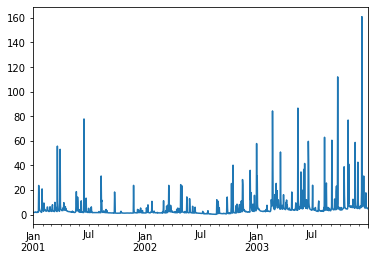

In [12]:
Q_Upper.plot()